In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# simulación de datos

x = np.linspace(-10, 10, 50)
y = 2*x**2+3*x+5*np.random.normal(0, 4, size=len(x))


In [4]:
print(x)

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]


In [5]:
print(y)

[151.8467017  190.84728192 114.43051038 111.88273794  69.98526314
 109.10924479  81.96016325  61.62897708  79.51641229  29.27513534
  60.32958858  49.67009872  17.69692739 -13.56685532  44.37767094
  20.36689775  33.41252964  12.26791434  30.3151772    9.77237687
  44.48786189  -4.7147106   37.29668328  -1.96852554 -20.78111941
 -19.68322209   5.49240761  -4.13673963  30.07595522 -19.9249599
   6.69882125  22.43019698  21.28849791  33.50294447  53.07452491
  51.79151531  55.10959853  67.78847749  44.83324155  86.2897059
  93.03571342 109.12098447  90.1169664  118.03745889 139.55557662
 139.71703642 177.58169262 198.58102845 197.19294926 232.51866331]


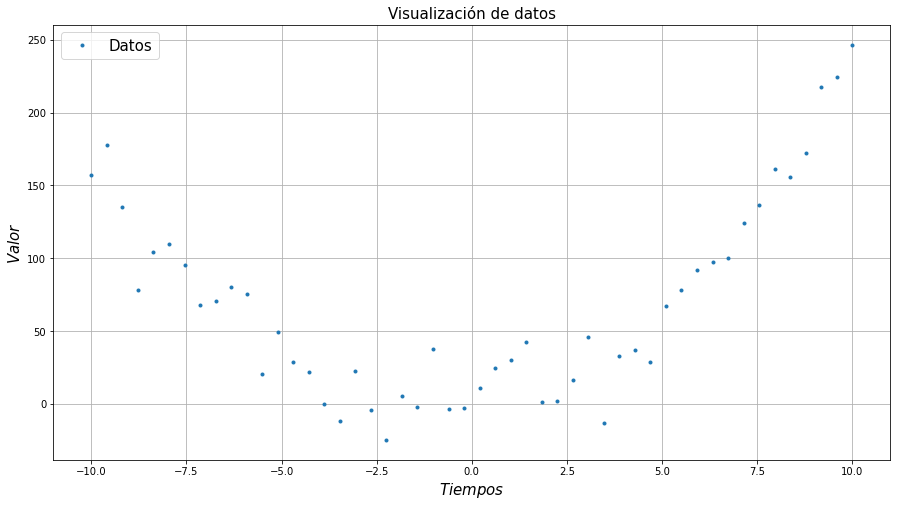

In [14]:
# visualizando datos
plt.figure(figsize=(15, 8))
plt.title("Visualización de datos", fontsize=15)
plt.plot(x, y, '.')
plt.legend(["Datos"], fontsize=15)
plt.xlabel("$Tiempos$", fontsize=15)
plt.ylabel("$Valor$", fontsize=15)

plt.grid()

plt.show()


![perceptron](./perceptron.png)

In [17]:
model = keras.Sequential(keras.layers.Dense(units=1, input_shape=(1,)))


In [19]:
# compilando NN (forma de optimizar)
model.compile(optimizer="sgd", loss="mean_squared_error")


In [20]:
# resumen de la NN
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [29]:
# visualizar modelos en forma de grafo
from tensorflow.keras.utils import plot_model
plot_model(model)


('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [30]:
# entrenando red neuronal (Fancy para ajustar los datos)
model.fit(x, y, epochs=10, verbose=1)


2022-08-21 23:21:59.650880: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-21 23:21:59.669817: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593345000 Hz


Epoch 1/10
2/2 [==============================] - 0s 41ms/step - loss: 9725.4082
Epoch 2/10
2/2 [==============================] - 0s 2ms/step - loss: 9158.4134
Epoch 3/10
2/2 [==============================] - 0s 2ms/step - loss: 8213.6248
Epoch 4/10
2/2 [==============================] - 0s 4ms/step - loss: 7203.1045
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 7550.5148
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 7434.7017
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 7132.3019
Epoch 8/10
2/2 [==============================] - 0s 5ms/step - loss: 7210.6322
Epoch 9/10
2/2 [==============================] - 0s 8ms/step - loss: 7599.6641
Epoch 10/10
2/2 [==============================] - 0s 2ms/step - loss: 6604.4647


In [31]:
# visualizar datos de la red
w = model.get_weights()
print(w)

print("\nObjeto pesos: ", w)
print("\nNumber of weights -> " + str(len(w)))
print('\nw = : ' + str(w[0][0]) + '(weight)')
print("\nb = " + str(w[1])+'("Weigth" -> Bias)')


[array([[3.713388]], dtype=float32), array([22.840014], dtype=float32)]

Objeto pesos:  [array([[3.713388]], dtype=float32), array([22.840014], dtype=float32)]

Number of weights -> 2

w = : [3.713388](weight)

b = [22.840014]("Weigth" -> Bias)


In [32]:
# predecir valores dentro de los datos
predecir = model.predict(x)

print(predecir)


[[-14.293867 ]
 [-12.7782   ]
 [-11.262529 ]
 [ -9.746859 ]
 [ -8.231192 ]
 [ -6.715523 ]
 [ -5.199856 ]
 [ -3.684187 ]
 [ -2.168518 ]
 [ -0.6528492]
 [  0.8628197]
 [  2.3784866]
 [  3.8941574]
 [  5.4098244]
 [  6.925494 ]
 [  8.441162 ]
 [  9.956831 ]
 [ 11.4725   ]
 [ 12.988168 ]
 [ 14.503837 ]
 [ 16.019505 ]
 [ 17.535173 ]
 [ 19.050842 ]
 [ 20.566511 ]
 [ 22.08218  ]
 [ 23.597847 ]
 [ 25.113516 ]
 [ 26.629185 ]
 [ 28.144854 ]
 [ 29.660522 ]
 [ 31.17619  ]
 [ 32.69186  ]
 [ 34.207527 ]
 [ 35.723198 ]
 [ 37.238865 ]
 [ 38.75453  ]
 [ 40.270203 ]
 [ 41.78587  ]
 [ 43.30154  ]
 [ 44.817207 ]
 [ 46.33288  ]
 [ 47.848545 ]
 [ 49.364212 ]
 [ 50.879883 ]
 [ 52.39555  ]
 [ 53.911217 ]
 [ 55.426888 ]
 [ 56.94256  ]
 [ 58.45823  ]
 [ 59.973892 ]]


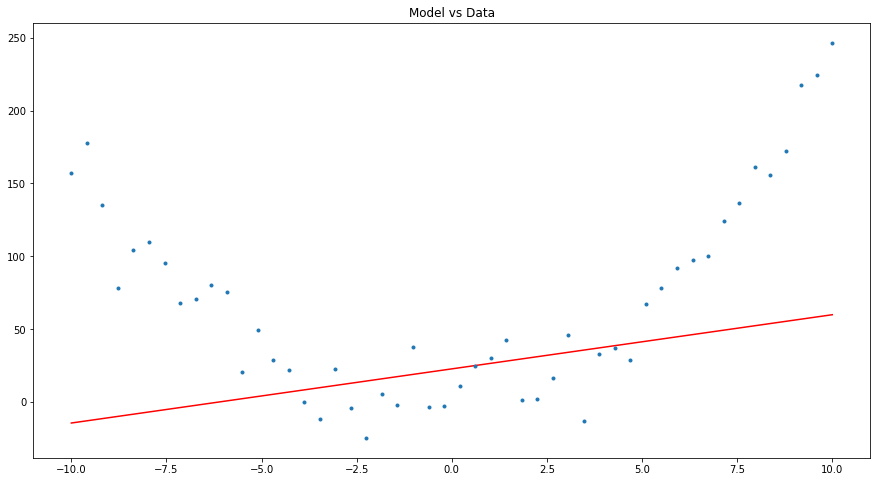

In [33]:
# visualizat resultados

plt.figure(figsize=(15, 8))
plt.plot(x, predecir, '-r')
plt.plot(x, y, '.')
plt.title("Model vs Data")
plt.show()


In [37]:
# mejorando red neuronal
model2 = tf.keras.Sequential(
    [keras.layers.Dense(units=5, input_shape=(1,), activation="softplus"), keras.layers.Dense(units=10,  activation="softplus"), keras.layers.Dense(units=20,  activation="softplus"), keras.layers.Dense(units=1)])

model2.compile(optimizer="adam", loss="mean_squared_error")
model2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_4 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model2.fit(x, y, epochs=1000, verbose=0)


In [39]:
x_test = np.linspace(x[0], x[-1], 300)
predecir_2 = model2.predict(x_test)


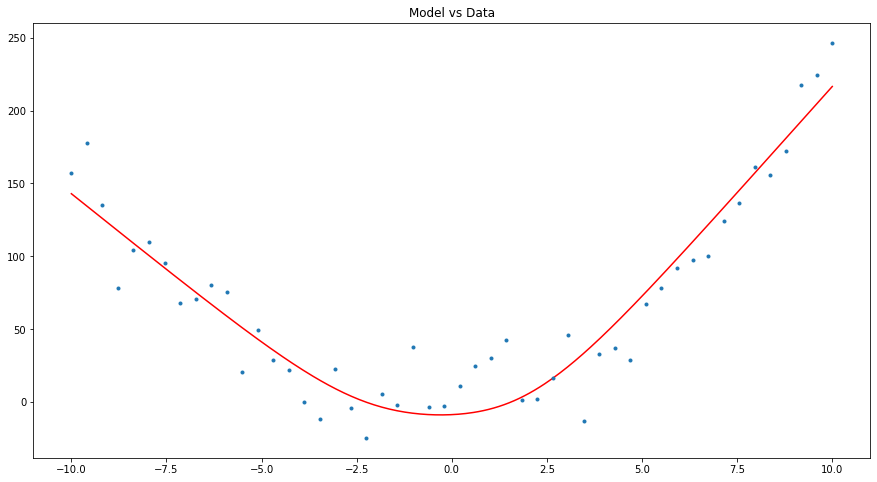

In [40]:
# visualizat resultados

plt.figure(figsize=(15, 8))
plt.plot(x_test, predecir_2, '-r')
plt.plot(x, y, '.')
plt.title("Model vs Data")
plt.show()

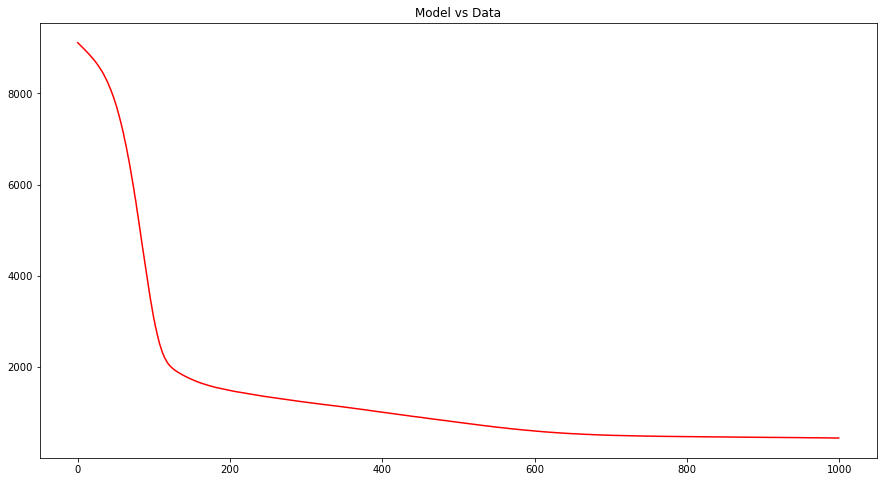

In [41]:
# visualizar resultados

plt.figure(figsize=(15, 8))
plt.plot(history.history["loss"], '-r', label="Loss")
plt.title("Model vs Data")
plt.show()